# Balancing Cart Pole in Open AI Gym using Deep Reinforcement Learning

The Ultimate Guide for Implementing a Cart Pole Game using Python, Deep Q Network (DQN), Keras and Open AI Gym.

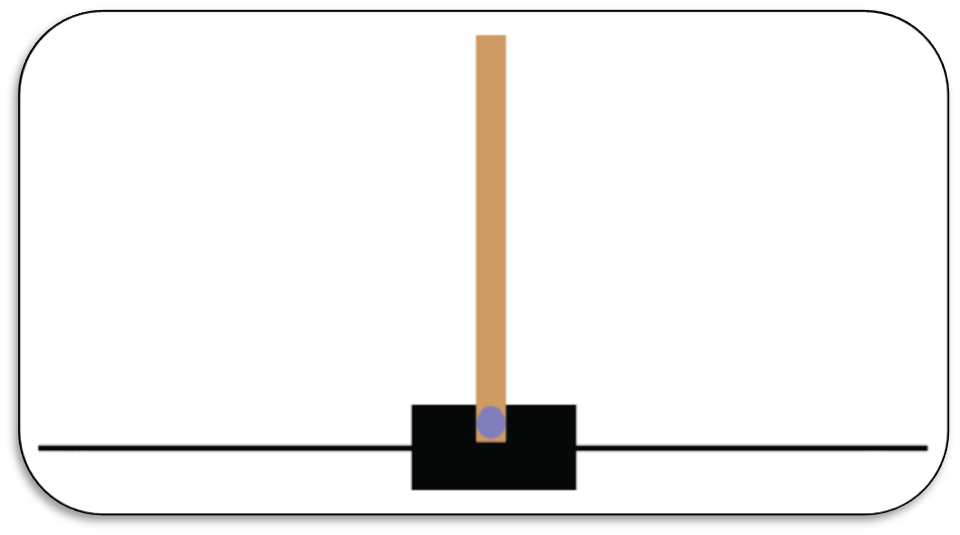

## Introduction

Reinforcement Learning is a type of machine learning that allows us to create AI agents that learn from their mistakes and improves their performance in the environment by interacting to maximize their cumulative reward.

AI agents will learn it by trial and error and agents are incentivized with punishments for wrong actions and rewards for good ones.

In this project, I will demonstrate and show how we can harness the power of how Deep Reinforcement learning (Deep Q-learning) can be implemented and applied to play a Cart Pole game using Keras, DQN Algorithm and Open AI Gym.


## Steps to Implement Cart Pole Game using Keras, Deep Q Network (DQN) Algorithm and Open AI Gym

1.	Problem Statement
2.	Importing Libraries
3.	Setting up the Environment with Open AI Gym
4.	Implementing DQN Algorithm by applying LinearAnnealed - EpsGreedyQPolicy
5.	Building DQN Agent with Keras-RL
6.	Testing the DQN Agent for 20 Episodes 
7.	Saving the Best DQN Model


## 1.	Problem Statement

The main objective of this task is to apply Deep Reinforcement learning to replace the human element in the CartPole-V0 environment in Open AI Gym environment using the Deep Q Network (DQN) algorithm. 

Conditions for Cart Pole Game:

- The goal is to balance the pole by moving the cart from side to side to keep the pole balanced upright.
- If the pole angle is more than 12 degrees or the cart moves by more than 2.4 units from the centre, then the game will end and if the pole remains standing for 200 steps, then the game is successful.
- Apply Linear annealed policy with the EpsGreedyQPolicy as the inner policy.
- Achieve a DQN model that trains in the least possible number of episodes.
- Balance pole on the cart for 200 steps (Maximum Reward) for 20 consecutive episodes while testing.


## 2. Importing Libraries

- Keras rl2 : Integrates with the  OpenAI Gym  to evaluate and play around with DQN Algorithm
- Matplotlib: For displaying images and plotting model results.
- Gym : Open AI Gym for setting up the Cart Pole Environment to develop and test Reinforcement learning algorithms.
- Keras: We use Keras, a high-level API to build and train deep learning models in TensorFlow. 

In [ ]:
#Install keras rl2 which seamlessly integrates with the  OpenAI Gym  to evaluate and play around with DQN Algorithm
!pip install keras-rl2

In [ ]:
#Install Open AI Gym for the Cart Pole Environment
!pip install gym

In [ ]:
# Import the gym module
#Import Matplotlib to visualize the training steps
#Import the Keras modules for creating deep neural networks

import gym
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Input, Flatten, Dense

## 3.	Setting up the Cart Pole Environment with Open AI Gym

CartPole is one of the most simplest environments in OpenAI gym which is collection of environments to develop and test Reinforcement algorithms.

The goal of CartPole is to balance a pole connected with one joint on top of a moving cart. An agent can move the cart by performing a series of 0 or 1 actions, pushing it left or right.

1. Observation is an array of 4 floats which contains
 - Angular Position and Velocity of the Cart
 - Angular Position and Velocity of the Pole
2. Reward is a scalar float value
3. Action is a scalar integer with only two possible values:
 - 0 — "move left"
 - 1 — "move right"

In [ ]:
#Load the CartPole environment from the OpenAI Gym suite
ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

## 4.	Implementing DQN Algorithm by applying LinearAnnealed - EpsGreedyQPolicy

A policy defines the way an agent acts in an environment. Typically, the goal of reinforcement learning is to train the underlying model until the policy produces the desired outcome.

In this task, we will set our policy as Linear Annealed with the EpsGreedyQPolicy as the inner policy, memory as Sequential Memory because we want to store the result of actions we performed and the rewards we get for each action.

**Epsilon-Greedy Policy**

Epsilon-Greedy means choosing the best (greedy) option now, but sometimes choosing a random option that is unlikely (epsilon).

The idea is that we specify an exploration rate - epsilon, which is initially set to 1. In the beginning, this rate should be the highest value because we know nothing about the importance of the Q table. 

In simple terms, we need to have a big epsilon value at the beginning of Q function training and then gradually reduce it as the agent has more confidence in the Q values.


## 5. Building DQN Agent with Keras-RL

In [ ]:
import rl
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy

# setup experience replay buffer
memory = SequentialMemory(limit=50000, window_length=1)

# setup the Linear annealed policy with the EpsGreedyQPolicy as the inner policy
policy =  LinearAnnealedPolicy(inner_policy=  EpsGreedyQPolicy(),   # policy used to select actions
                               attr='eps',                          # attribute in the inner policy to vary             
                               value_max=1.0,                       # maximum value of attribute that is varying
                               value_min=0.1,                       # minimum value of attribute that is varying
                               value_test=0.05,                     # test if the value selected is < 0.05
                               nb_steps=10000)                      # the number of steps between value_max and value_min

#Feed-Forward Neural Network Model for Deep Q Learning (DQN)
model = Sequential()
#Input is 1 observation vector, and the number of observations in that vector 
model.add(Input(shape=(1,env.observation_space.shape[0])))  
model.add(Flatten())
#Hidden layers with 24 nodes each
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='relu'))
#Output is the number of actions in the action space
model.add(Dense(env.action_space.n, activation='linear')) 


#Feed-Forward Neural Network Architecture Summary
print(model.summary())

#Defining DQN Agent for DQN Model
dqn = DQNAgent(model=model,                     # Q-Network model
               nb_actions=env.action_space.n,   # number of actions
               memory=memory,                   # experience replay memory
               nb_steps_warmup=25,              # how many steps are waited before starting experience replay
               target_model_update=1e-2,        # how often the target network is updated
               policy=policy)                   # the action selection policy

# Finally, we configure and compile our agent. 
#We can use built-in tensorflow.keras Adam optimizer and evaluation metrics            
from tensorflow.keras.optimizers import Adam
dqn.compile(Adam(learning_rate=1e-3), metrics=['mae','accuracy'])

#Finally fit and train the agent
history = dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 24)                120       
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________
None
Training for 50000 steps ...
    13/50000: episode: 1, duration: 0.057s, episode steps:  13, steps per second: 227, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean ac

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


    32/50000: episode: 2, duration: 0.626s, episode steps:  19, steps per second:  30, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.421 [0.000, 1.000],  loss: 0.489724, mae: 0.525041, accuracy: 0.229167, mean_q: 0.064776, mean_eps: 0.997435
    42/50000: episode: 3, duration: 0.144s, episode steps:  10, steps per second:  70, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.800 [0.000, 1.000],  loss: 0.420551, mae: 0.537733, accuracy: 0.393750, mean_q: 0.211851, mean_eps: 0.996715
    56/50000: episode: 4, duration: 0.127s, episode steps:  14, steps per second: 110, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.714 [0.000, 1.000],  loss: 0.375872, mae: 0.576709, accuracy: 0.470982, mean_q: 0.453621, mean_eps: 0.995635
    75/50000: episode: 5, duration: 0.155s, episode steps:  19, steps per second: 123, episode reward: 19.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.421 [0.000, 1.000

### Summary of Training episode steps and the total episodes of the DQN Model

One iteration of the Cartpole-v0 environment consists of 200-time steps.

The environment gives a reward of +1 for each step the pole stays up, so the maximum return for one episode is 200. 

During its training, this instance of the DQN agent was able to achieve a maximum reward of 200 at 125 episodes, meaning it reached 200 steps without dropping the pole with the least number of possible episodes while training. 

From the graph, we can observe how in the first episodes, the rewards stay low as the agent is still exploring the state-space and learning the values for each state-action pair.

However, as we complete more episodes, the agent’s performance keeps improving and more episodes are completed.


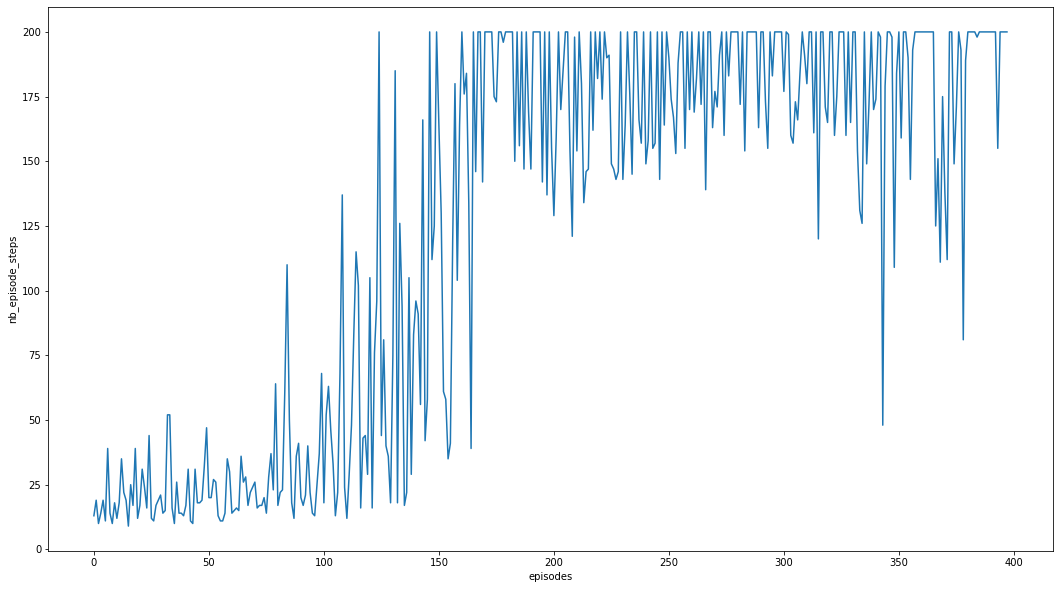

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200


In [ ]:
# Visualize the history for number of Training episode steps of the Cart Pole Game
plt.figure(figsize = (18,10))
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

# Finally, evaluate and test our algorithm for 20 episodes.
dqn.test(env, nb_episodes=20, visualize=False)

In [ ]:
# After training is done, we save the final weights.
dqn.save_weights('dqn_weights.h5f', overwrite=True)

## 6. Conclusion

In this project, we discussed how to implement balancing Cart Pole Game using Deep Q Network (DQN), Keras and Open AI Gym. 

While this DQN agent seems to be performing well already, its performance can be further improved by applying advanced Deep Q learning algorithms like Double DQN Networks, Dueling DQN and Prioritized Experience replay which can further improve the learning process and give us better scores using an even lesser number of episodes.

## 7. References

- https://gym.openai.com/docs/
- https://gym.openai.com/envs/CartPole-v0/
- https://www.tensorflow.org/agents/tutorials/1_dqn_tutorial
